<h1>Introduction:</h1> 


*   <b>In the given dataset invoice details by product description and category is presented.</b>



<h1>Problem statement:</h1>


*   <b>Issue in identifying product category basis items.</b>



<h1>Solution approach:</h1> 

*   <b>Our goal is to identify or ascertain the product category basis certain input features.</b>
  




# Libraries
* <b>Importing required libraries for operation of specific functionalities.</b>


In [19]:
# Data Processing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8
import warnings
warnings.filterwarnings('ignore')

#Encoding Library
from sklearn.preprocessing import LabelEncoder

#Data Cleaning libralies
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

#Vectorizor
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Spliting Library
from sklearn.model_selection import train_test_split, GridSearchCV

#Model Library
from xgboost import XGBClassifier

#Performance Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Loading
* <b>Reading the csv files into the notebook.</b>

In [20]:
train = pd.read_csv('/content/train_set.csv')
test = pd.read_csv('/content/test_set.csv')

In [21]:
train

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376
...,...,...,...,...,...,...
5283,23004,VENDOR-2117,GL-6101400,14.17,General Contractor General Requirements Final ...,CLASS-1522
5284,23005,VENDOR-1736,GL-2182000,84.88,Human Resources Corporate Services Contingent ...,CLASS-1376
5285,23007,VENDOR-2226,GL-6050310,94.78,Logistics Transportation Services Parcel/Posta...,CLASS-1870
5286,23008,VENDOR-1036,GL-6100500,57.01,2005Sep Addmaster Corp Magazines Media Buy - T...,CLASS-1721


#	Exploratory Data Analysis of variables









* Checking the dimension of datasets- Number of Rows and columns.

In [22]:
train.shape

(5288, 6)

In [23]:
test.shape

(278, 5)

* Deriving information about data types, null values and total entries.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5288 non-null   int64  
 1   Vendor_Code       5288 non-null   object 
 2   GL_Code           5288 non-null   object 
 3   Inv_Amt           5288 non-null   float64
 4   Item_Description  5288 non-null   object 
 5   Product_Category  5288 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


* Deriving statistical description of numeric features.

In [25]:
train.describe()

,Inv_Id,Inv_Amt
count,5288.000000,5288.000000
mean,19016.049924,49.890034
std,2310.739549,28.835716
min,15001.000000,0.010000
25%,17013.750000,25.062500
50%,19023.000000,49.560000
75%,21004.250000,74.945000
max,23010.000000,99.990000


* Checking unique values by features.

In [26]:
def unique_values(data):
  for col in data.columns:
    print(f'{col} has {data[col].nunique()} unique values.')

In [27]:
unique_values(train)

Inv_Id has 5288 unique values.
Vendor_Code has 1206 unique values.
GL_Code has 9 unique values.
Inv_Amt has 4099 unique values.
Item_Description has 5281 unique values.
Product_Category has 36 unique values.



* <h4>Objective of the below analysis is to ascertain the invoice details as in quantity and valuation basis <b>product category</b>.
This analysis helps in tracking the invoice amount and the number of invoices.</h4>

In [28]:
product_cate_basis_Inv = train.groupby(['Product_Category']).agg({'Inv_Id':'count','Inv_Amt':'sum'})
product_cate_basis_Inv.sort_values(by='Inv_Amt',ascending=False)

,Inv_Id,Inv_Amt
Product_Category,,
CLASS-1758,1421,71136.15
CLASS-1274,939,47153.57
CLASS-1522,803,38624.53
CLASS-1250,440,22902.55
CLASS-1376,347,17814.97
CLASS-1963,215,10231.40
CLASS-1249,167,8688.27
CLASS-1828,107,5638.99
CLASS-2141,103,5021.15


* <h4>This analysis provides details for item description which falls under each product category and the invoice amount pertaining to respective items.</h4>

In [29]:
product_valuation_basis_desc = train.groupby(['Product_Category','Item_Description']).agg({'Inv_Amt':'sum'})
product_valuation_basis_desc

Inv_Amt
Product_Category Item_Description                                           
CLASS-1248       2001-Apr  Avalon Corp Audit & Risk Consulting F...    43.76
                 Audit & Risk Consulting Corporate Services Aval...    36.35
                 Combined Insurance Co Of America Dec2011 Corpor...    78.84
                 Consulting Finance Consulting Audit & Risk Cons...    14.78
CLASS-1249       2000-Feb  Daly John J Auto Fleet Repair and Mai...     7.76
...                                                                      ...
CLASS-2241       Workmen's Insurance Corporate Services Asarco I...    92.75
                 Workmen's Insurance Corporate Services Bates Ch...    41.27
                 Workmen's Insurance Corporate Services Furon Co...    15.66
                 Workmen's Insurance Dec 2006 Corporate Services...    53.48
                 Workmen's Insurance May 2006 Corporate Services...    60.88

[5281 rows x 1 columns]

<h5>In the below analysis Vendor code is classified basis Product category and the total invoice amount for each is available.</h5>

* This analysis not only helps to identify multiple vendors for each product category but also helps in deriving information about the invoice amount for each vendor category by products ( we can further refer to the item description for each product category to do in-depth analysis ).

In [30]:
vendor_data = train.groupby(['Product_Category','Vendor_Code']).agg({'Inv_Amt':'sum'})
vendor_data.sort_values(by='Inv_Amt', ascending=False)

Inv_Amt
Product_Category Vendor_Code          
CLASS-1250       VENDOR-1883  16292.98
CLASS-1758       VENDOR-1513  11497.44
                 VENDOR-2513   7563.67
CLASS-1250       VENDOR-1551   6512.19
CLASS-1249       VENDOR-1944   6380.70
...                                ...
CLASS-1477       VENDOR-1469      0.99
CLASS-1274       VENDOR-1589      0.55
                 VENDOR-1996      0.41
CLASS-2003       VENDOR-1936      0.40
CLASS-1828       VENDOR-1958      0.39

[1284 rows x 1 columns]

<h4>The below analysis provides information by GL_Code and the invoice amount falling under each.</h4>

* This can be used to track the type of transaction amount as per GL_Code description. The business can derive insights on its payables or recievables as the case may be.

* The visualizaion of the information is presented in a bar graph form to have more clarity and insight.




In [31]:
transaction_analytics = train.groupby(['GL_Code']).agg({'Inv_Amt':'sum'})
transaction_analytics


,Inv_Amt
GL_Code,
GL-2182000,63401.57
GL-6020600,1441.95
GL-6050100,45909.73
GL-6050310,76446.32
GL-6060100,7708.36
GL-6100410,17848.06
GL-6100500,10393.48
GL-6101400,36696.22
GL-6121905,3972.81


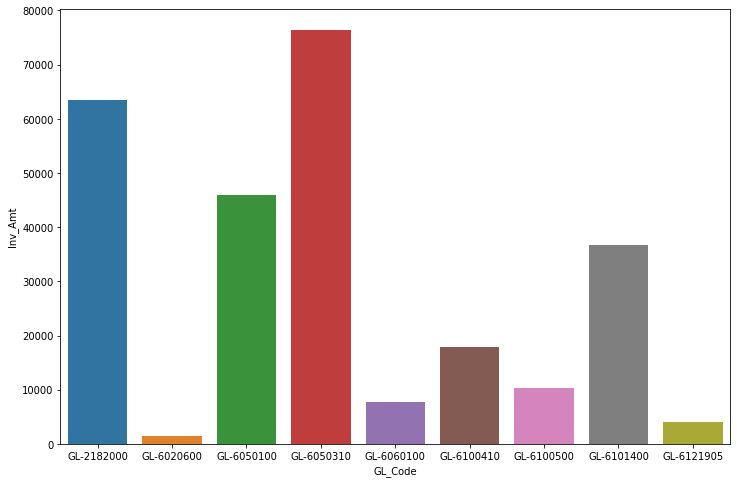

In [32]:
sns.barplot(x=transaction_analytics.index, y='Inv_Amt', data=transaction_analytics)

<h4>Product_Category Count and visualization.</h4>

In [33]:
train['Product_Category'].value_counts()


CLASS-1758    1421
CLASS-1274     939
CLASS-1522     803
CLASS-1250     440
CLASS-1376     347
CLASS-1963     215
CLASS-1249     167
CLASS-1828     107
CLASS-2141     103
CLASS-1721     103
CLASS-1567      80
CLASS-1919      61
CLASS-2112      52
CLASS-1850      51
CLASS-1477      48
CLASS-2241      36
CLASS-1870      35
CLASS-1309      31
CLASS-2003      31
CLASS-1429      30
CLASS-1322      28
CLASS-1964      27
CLASS-1294      24
CLASS-1770      19
CLASS-1983      16
CLASS-1867      15
CLASS-1652      14
CLASS-2038      13
CLASS-1805      10
CLASS-2152       9
CLASS-1248       4
CLASS-1688       4
CLASS-2146       2
CLASS-1838       1
CLASS-1957       1
CLASS-2015       1
Name: Product_Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

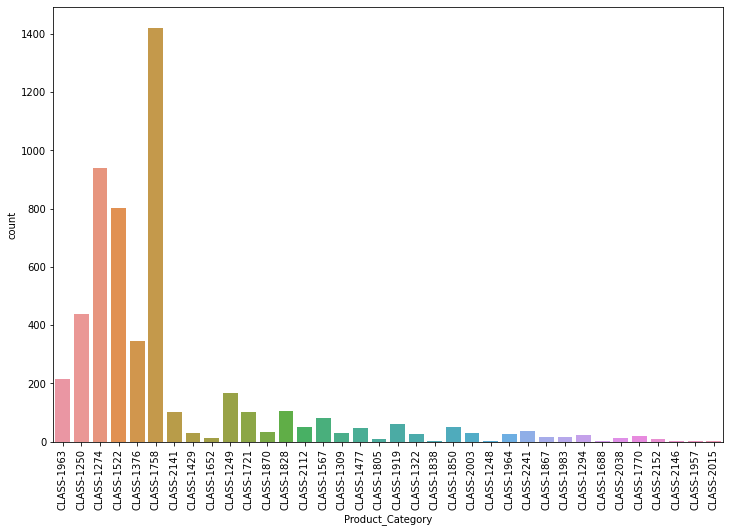

In [34]:
sns.countplot(train['Product_Category'])
plt.xticks(rotation=90)

# Text Preprocessing

<h4>After analysing each feature the most suitable feature identified is <b>" Item_description"</b> which can be used to classify the <b>Product_category</b>.</h4>

<h4>"clean_data" function is used to refine the item decription column.</h4>


*   Removing stopwords
*   Regular expression is used to remove special characters and numbers
*   Lemmatization is used for conversion of words in to their root forms. 

In [35]:
def clean_data(df,col):
  stop = set(stopwords.words('english'))
  WN = WordNetLemmatizer()
  corpus = []

  for i in range(0,len(df)):
      review = re.sub('[^a-zA-Z]', ' ',df[col][i])
      review = review.lower()
      review = review.split()
      review = [WN.lemmatize(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  df[col] = corpus

  return 'DONE'


In [36]:
clean_data(train,'Item_Description')
clean_data(test,'Item_Description')


'DONE'

In [37]:
main_train = train['Item_Description']
main_test = test['Item_Description']

<h4> Model does not understand categorical value so coversion of words into vector is required</h4>


*   To do that Tf-Idf Vectorizor is used.


In [38]:
vect = TfidfVectorizer(ngram_range=(1,2),min_df=10)
vect.fit(main_train)
final_train = vect.transform(main_train)
final_test = vect.transform(main_test)

* Encoding Product_Category 

In [39]:
le = LabelEncoder()
target = le.fit_transform(train['Product_Category'])

* <h4>Spliting dataset for training and testing.</h4>

In [40]:
x_train,x_test,y_train,y_test = train_test_split(final_train, target, test_size=0.25, random_state=1)

# Ml Model
* Since in the given data set, class distribution is skewed , XGboost Classifier has been brought into application.

* Multi:softprob has been used to accomodate mutiple class situation

In [41]:
model = XGBClassifier(max_depth=6,learning_rate=0.1,objective='multi:softprob',eval_metric='mlogloss',num_class=len(le.classes_))
eval_set = [(x_train,y_train),(x_test,y_test)]
model.fit(x_train,y_train,eval_set=eval_set)

[0]	validation_0-mlogloss:2.02618	validation_1-mlogloss:2.03159
[1]	validation_0-mlogloss:1.67867	validation_1-mlogloss:1.68454
[2]	validation_0-mlogloss:1.43535	validation_1-mlogloss:1.44155
[3]	validation_0-mlogloss:1.24837	validation_1-mlogloss:1.25443
[4]	validation_0-mlogloss:1.0974	validation_1-mlogloss:1.10367
[5]	validation_0-mlogloss:0.971659	validation_1-mlogloss:0.977885
[6]	validation_0-mlogloss:0.864461	validation_1-mlogloss:0.870561
[7]	validation_0-mlogloss:0.772121	validation_1-mlogloss:0.778126
[8]	validation_0-mlogloss:0.691713	validation_1-mlogloss:0.697609
[9]	validation_0-mlogloss:0.621122	validation_1-mlogloss:0.626833
[10]	validation_0-mlogloss:0.558821	validation_1-mlogloss:0.564501
[11]	validation_0-mlogloss:0.503577	validation_1-mlogloss:0.509247
[12]	validation_0-mlogloss:0.454357	validation_1-mlogloss:0.460007
[13]	validation_0-mlogloss:0.410362	validation_1-mlogloss:0.415939
[14]	validation_0-mlogloss:0.371023	validation_1-mlogloss:0.376622
[15]	validation_

XGBClassifier(eval_metric='mlogloss', max_depth=6, num_class=36,
              objective='multi:softprob')

# Model Evaluation
* To check the performance of the model different metrics are used such as <b>Accuracy score, Classification report, Cross validation score and Residual plot.</b>

* Accuracy Score

In [42]:
y_pred = model.predict_proba(x_test)
model_score = model.score(x_test,y_test)
print("Model Score is:",round((model_score*100),2))

Model Score is: 99.85


* Classification Report

In [43]:
val_pred = np.argmax(model.predict_proba(x_test), axis=-1)
print(classification_report(y_test,val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00       239
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       210
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00         3
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00       339
          16       1.00      1.00      1.00         6
          17       1.00    

* Cross validation score

In [44]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model,final_train,target,cv=10)
cv_score = pd.DataFrame(cv_score, columns=['cross_val_score'])

In [45]:
cv_score

,cross_val_score
0,1.000000
1,1.000000
2,0.996219
3,0.998110
4,0.998110
5,0.998110
6,0.996219
7,0.998110
8,1.000000
9,1.000000


In [46]:
print(f'Cross Validation Score: {round(cv_score.iloc[:,0].mean()*100,2)}')

Cross Validation Score: 99.85


<h4>Ploting residuals</h4>


*   The variance between train and test is minimal which infers that model is not overfitting.




In [47]:
eval_result = model.evals_result_
train_mlog = eval_result['validation_0']['mlogloss']
test_mlog = eval_result['validation_1']['mlogloss']


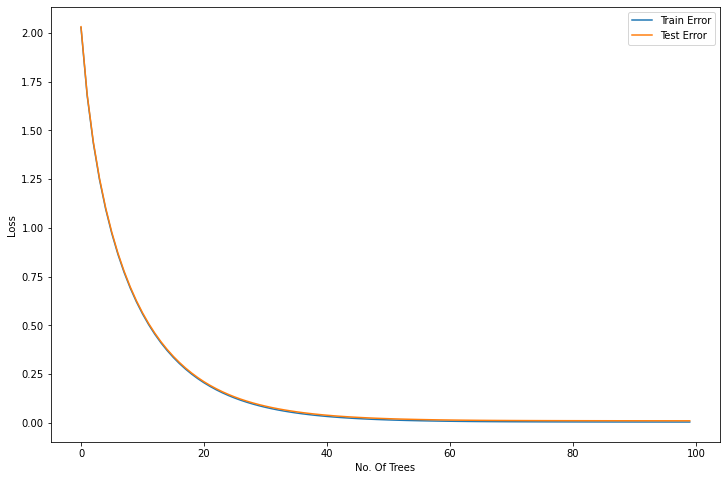

In [53]:
plt.plot(train_mlog, label='Train Error')
plt.plot(test_mlog, label='Test Error')
plt.xlabel("No. Of Trees")
plt.ylabel('Loss')
plt.legend()

# Submission
Test data prediction is stored in Submission.csv file

In [49]:
test_pred = model.predict_proba(final_test)

In [50]:
result_sub = test[['Inv_Id']].copy()
result_sub['Product_Category'] = le.inverse_transform(np.argmax(test_pred, axis=1))


In [51]:
result_sub.head()

,Inv_Id,Product_Category
0,15041,CLASS-1274
1,15094,CLASS-1963
2,15112,CLASS-1758
3,15179,CLASS-1522
4,15212,CLASS-1758


In [54]:
result_sub.to_csv('submission.csv',index=False)